In [1]:
# Import pandas 
import pandas as pd
import os
import json

In [2]:
def process_results(data):
    nested_values = ['video', 'author', 'music', 'stats', 'authorStats', 'challenges', 'duetInfo', 'textExtra', 'stickersOnItem']
    skip_values = ['challenges', 'duetInfo', 'textExtra', 'stickersOnItem']

    # Create blank dictionary
    flattened_data = {}
    # Loop through each video
    for idx, value in enumerate(data): 

        flattened_data[idx] = {}
        # Loop through each property in each video 
        for prop_idx, prop_value in value.items():
            # Check if nested
            if prop_idx in nested_values:
                if prop_idx in skip_values:
                    pass
                else:
                    # Loop through each nested property
                    for nested_idx, nested_value in prop_value.items():
                        flattened_data[idx][prop_idx+'_'+nested_idx] = nested_value
            # If it's not nested, add it back to the flattened dictionary
            else: 
                flattened_data[idx][prop_idx] = prop_value

    return flattened_data

In [3]:
from datetime import datetime

src_path = 'TikTok_scrape/output/'

count = 0
master_data = []

for root, dirs, files in os.walk(src_path):

    for filename in files:
        if "OrigSearch" in filename:
            # Load up data 
            with open(os.path.join(root, filename), 'r') as f:
                data = json.load(f)
                date = root.split("/")[2].replace("_fresh","")
                
                data["scrape_date"] = datetime.strptime(date, '%d%m%Y')
      
                master_data.append(data)
                
            f.close()
            
        count += 1


data_flat = process_results(master_data)
df = pd.DataFrame.from_dict(data_flat, orient='index')

print(df.head())
print(df.columns)

                    id                                               desc  \
0  7069787462242962694                                   #ukraine #russia   
1  7082556143888878890       #ukraine #ukrainevsrussia #ukrainewar #bucha   
2  7068388771854634245  I wish this is a bad dream and we will wake up...   
3  7082576425911323946                         its exciting every timeeee   
4  7071700963953741062        🇺🇦🤝 🇷🇺 #ukraine #supportukraine #fyp #nowar   

   createTime             video_id  video_height  video_width  video_duration  \
0  1646063166  7069787462242962694          1024          576              20   
1  1649036106  7082556143888878890          1024          576             104   
2  1645737509  7068388771854634245          1024          576               9   
3  1649040828  7082576425911323946          1024          576              15   
4  1646508688  7071700963953741062          1024          576              42   

  video_ratio                                     

In [4]:
groupdf = df.groupby(['scrape_date']).mean()
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

<ipython-input-8-19b0a1ec55e3>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)


AttributeError: '_iLocIndexer' object has no attribute 'index'

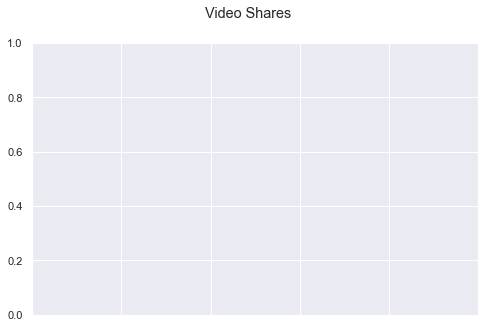

In [8]:
#sns.lineplot(ax=axes[0], x=groupdf.index, y=groupdf['stats_playCount'])

freq_df = pd.DataFrame(df["music_title"].value_counts()).head(15).iloc()

sns.set_theme()
fig, ax = plt.subplots(1, 1, figsize=(8, 5), sharey=True)
fig.suptitle('Video Shares')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)

# # Bulbasaur
sns.barplot(x=freq_df.index, y=freq_df["music_title"])

(array([19060., 19064., 19068., 19072., 19076., 19080., 19083., 19087.,
        19091.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

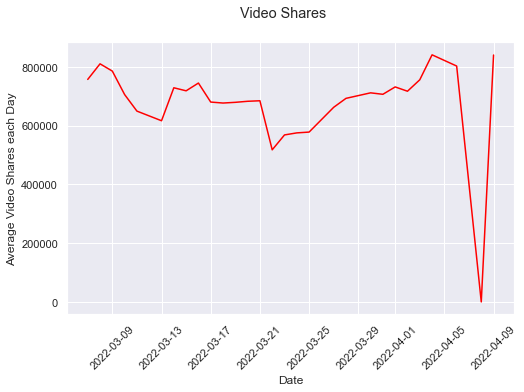

In [11]:
#sns.lineplot(ax=axes[0], x=groupdf.index, y=groupdf['stats_playCount'])
sns.set_context("poster", font_scale = .5, rc={"grid.linewidth": 0.6})
sns.set_theme()
fig, ax = plt.subplots(1, 1, figsize=(8, 5), sharey=True)
fig.suptitle('Video Shares')

# Bulbasaur
sns.lineplot(ax=ax, x=groupdf.index, y=groupdf['stats_diggCount'], color="red")
#axes[0].set_title(bulbasaur.name)
ax.set(xlabel='Date', ylabel='Average Video Shares each Day')
plt.xticks(rotation=45)

In [7]:
import sys
!{sys.executable} -m pip install wordcloud

In [9]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import re
%matplotlib

Using matplotlib backend: MacOSX


In [10]:

stopwords = set(STOPWORDS) 
comment_words = ' '

for val in df.desc:

   # typecaste each val to string 
    val = str(val) 

   # split the value 
    tokens = val.split(" ") 

    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
        
        tokens[i] = re.sub(r'\W+', '', tokens[i])

    for words in tokens: 
        comment_words = comment_words + words + ' '

wordcloud = WordCloud(
            background_color ='white', 
            stopwords = ["russia", "ukraine", "fyp", "foryou", "foryoupage"] + list(STOPWORDS), 
            min_font_size = 10, collocations=False).generate(comment_words) 

#print(wordcloud.words_)

# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off") 
plt.tight_layout(pad = 0) 

#plt.show() 